#📌 Extracción

In [17]:
# 📌 Extracción
import pandas as pd
import json

# Cargar el archivo JSON
with open("TelecomX_Data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Normalizar datos anidados a un DataFrame plano
df = pd.json_normalize(data)

# Vista rápida
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (7267, 21)


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#🔧 Transformación

In [3]:
# 🔧 Transformación
# Renombrar columnas para simplificar
df.columns = [col.replace("customer.", "")
                .replace("phone.", "")
                .replace("internet.", "")
                .replace("account.", "")
                .replace("Charges.", "")
             for col in df.columns]

# Convertir columnas numéricas
df["Monthly"] = pd.to_numeric(df["Monthly"], errors="coerce")
df["Total"] = pd.to_numeric(df["Total"], errors="coerce")

# Manejo de valores faltantes en 'Churn' (vacíos)
df["Churn"] = df["Churn"].replace("", pd.NA)

# Eliminar filas sin valor en Churn
df = df.dropna(subset=["Churn"])

# Crear columna de gasto promedio mensual
df["AvgChargesPerMonth"] = df.apply(lambda x: x["Total"]/x["tenure"] if x["tenure"]>0 else 0, axis=1)

# Confirmar limpieza
print("Valores nulos por columna:")
print(df.isnull().sum())

df.head()


Valores nulos por columna:
customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Monthly                0
Total                 11
AvgChargesPerMonth     0
dtype: int64


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Monthly    Total  AvgChargesPerMonth  
0      Mailed check    65.6   593.30           65.922222  
1      Mailed check    59.9   542.40           60.266667  
2  Electronic check    73.9   280.85           70.212500  
3  Electronic check    98.0  1237.85           95.219231  
4      Mailed check    83.9   267.40           89.133333  

[5 rows x 22 columns]

#📊 Carga y análisis


📌 Métricas descriptivas:
       SeniorCitizen       tenure      Monthly        Total  \
count    7043.000000  7043.000000  7043.000000  7032.000000   
mean        0.162147    32.371149    64.761692  2283.300441   
std         0.368612    24.559481    30.090047  2266.771362   
min         0.000000     0.000000    18.250000    18.800000   
25%         0.000000     9.000000    35.500000   401.450000   
50%         0.000000    29.000000    70.350000  1397.475000   
75%         0.000000    55.000000    89.850000  3794.737500   
max         1.000000    72.000000   118.750000  8684.800000   

       AvgChargesPerMonth  
count         7043.000000  
mean            64.698218  
std             30.270670  
min              0.000000  
25%             35.649000  
50%             70.300000  
75%             90.174158  
max            121.400000  


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_20752\2539275387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


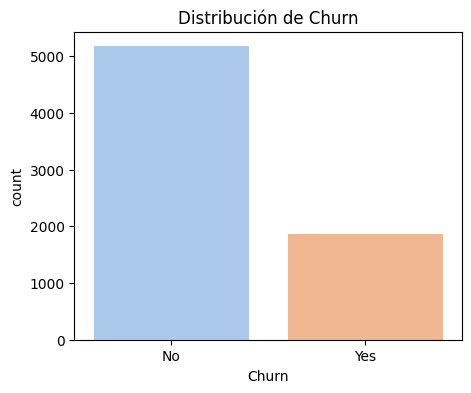

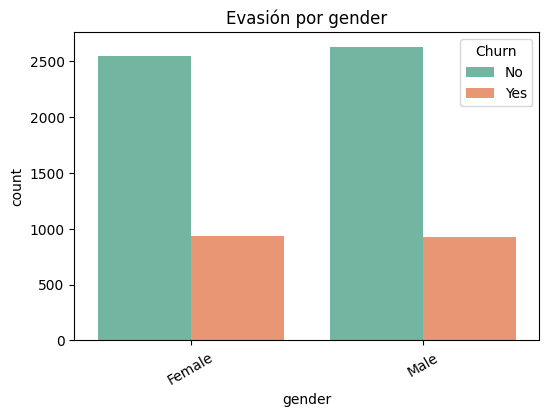

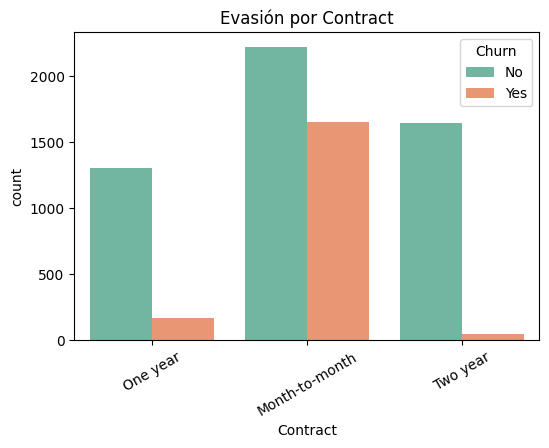

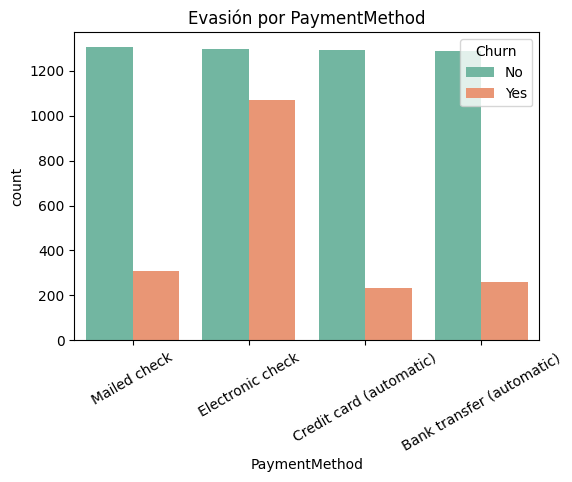

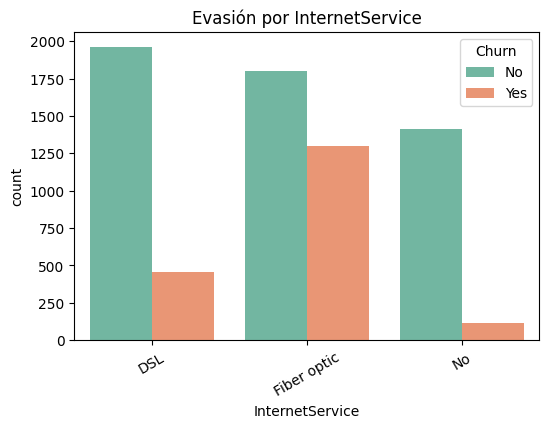

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_20752\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


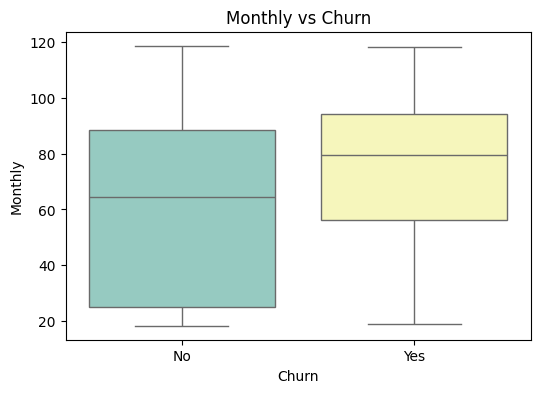

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_20752\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


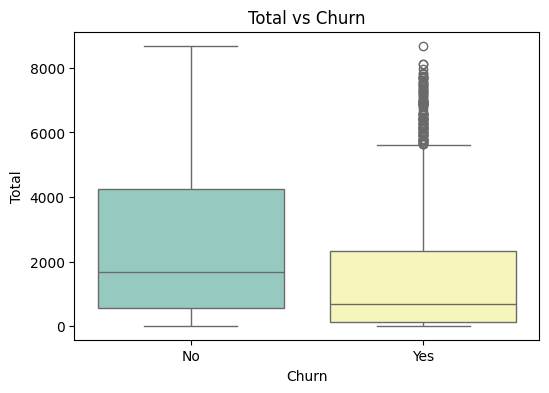

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_20752\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


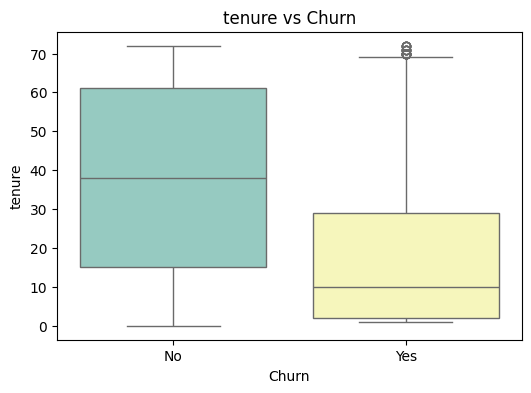

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_20752\2539275387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


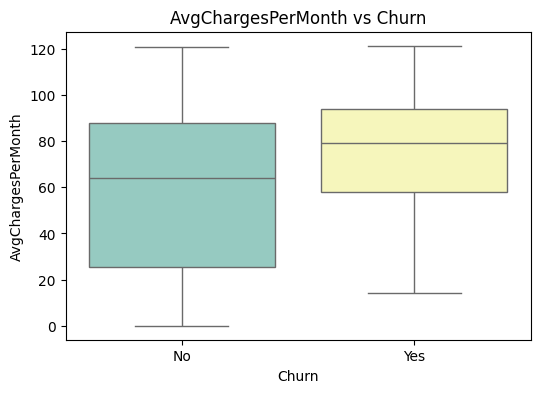

In [4]:
# 📊 Carga y análisis
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis descriptivo ---
print("\n📌 Métricas descriptivas:")
print(df.describe())

# Distribución de Churn
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Distribución de Churn")
plt.show()

# Relación Churn con variables categóricas
categoricas = ["gender", "Contract", "PaymentMethod", "InternetService"]
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"Evasión por {col}")
    plt.xticks(rotation=30)
    plt.show()

# Relación Churn con variables numéricas
numericas = ["Monthly", "Total", "tenure", "AvgChargesPerMonth"]
for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Churn")
    plt.show()


#📄Informe final

# 📄 Informe Final

## Introducción
El objetivo del análisis es comprender los patrones asociados a la evasión de clientes (Churn) en TelecomX. Reducir la evasión es clave para retener clientes y optimizar ingresos.

## Limpieza y Tratamiento de Datos
- Se cargaron los datos desde un archivo JSON y se normalizaron las estructuras anidadas.
- Se renombraron columnas para facilitar el análisis.
- Se convirtieron tipos de datos numéricos.
- Se eliminaron filas sin información en la variable `Churn`.
- Se creó la columna `AvgChargesPerMonth`.

## Análisis Exploratorio
- **Distribución de Churn**: La mayoría de los clientes permanecen, pero un porcentaje significativo presenta evasión.
- **Variables categóricas**: Mayor evasión en contratos "Month-to-month" y pagos por "Electronic check".
- **Variables numéricas**: Clientes que se dieron de baja tienden a tener menor tiempo de permanencia y gasto total más bajo.

## Conclusiones e Insights
- Contratos a corto plazo están más asociados con evasión.
- Métodos de pago electrónicos muestran mayor riesgo de cancelación.
- Clientes con menor tenure son más propensos a cancelar.

## Recomendaciones
- Ofrecer incentivos para migrar a contratos anuales o bianuales.
- Revisar políticas y experiencia de pago electrónico.
- Programas de fidelización para clientes nuevos durante los primeros meses.

## Parte 2 — Modelado Predictivo de Churn

**Objetivo:** desarrollar modelos que predigan la probabilidad de cancelación (churn) usando los datos limpios de la Parte 1.

Pasos:
1. Preparar datos (eliminar columnas irrelevantes, codificar variables, normalizar si es necesario).
2. Analizar correlaciones y relaciones con churn.
3. Entrenar al menos dos modelos de clasificación.
4. Evaluar rendimiento y comparar.
5. Interpretar resultados y extraer factores clave.

In [5]:
# Copiamos el DataFrame limpio de la Parte 1
df_modelo = df.copy()

# Eliminar columnas no útiles para el modelo (identificadores únicos)
cols_drop = []
for col in ["customerID", "CustomerID", "id", "ID"]:
    if col in df_modelo.columns:
        cols_drop.append(col)

df_modelo.drop(columns=cols_drop, inplace=True, errors="ignore")
print("Columnas eliminadas:", cols_drop)
df_modelo.head()

Columnas eliminadas: ['customerID']


Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Monthly    Total  AvgChargesPerMonth  
0      Mailed check    65.6   593.30           65.922222  
1      Mailed check    59.9   542.40           60.266667  
2  Electronic check    73.9   280.85           70.212500  
3  Electronic check    98.0  1237.85           95.219231  
4      Mailed check    83.9   267.40           89.133333  

[5 rows x 21 columns]

In [6]:
# Variable objetivo binaria
df_modelo["Churn"] = df_modelo["Churn"].astype(str).str.strip().str.title()
y = df_modelo["Churn"].map({"Yes": 1, "No": 0})

# Variables categóricas
X_base = df_modelo.drop(columns=["Churn"])
cat_cols = X_base.select_dtypes(include=["object"]).columns.tolist()

# One-hot encoding
X = pd.get_dummies(X_base, columns=cat_cols, drop_first=True)

print("Shape X:", X.shape, "| Shape y:", y.shape)
X.head()

Shape X: (7043, 31) | Shape y: (7043,)


SeniorCitizen  tenure  Monthly    Total  AvgChargesPerMonth  gender_Male  \
0              0       9     65.6   593.30           65.922222        False   
1              0       9     59.9   542.40           60.266667         True   
2              0       4     73.9   280.85           70.212500         True   
3              1      13     98.0  1237.85           95.219231         True   
4              1       3     83.9   267.40           89.133333        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                           False  ...                            False   
1                           False  ...                            False   
2                           False  ...                            False   
3                           False  ...                            False   
4                           False  ...                            False   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0             True                                False                False   
1            False                                False                 True   
2            False                                False                False   
3             True                                False                 True   
4             True                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0               True              False                  True   
1              False              False                 False   
2              False              False                  True   
3              False              False                  True   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_Mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 31 columns]

Proporción de churn:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


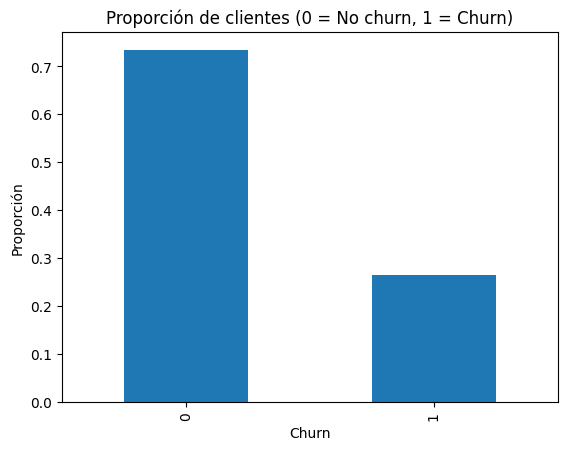

In [7]:
prop = y.value_counts(normalize=True)
print("Proporción de churn:")
print(prop)

prop.plot(kind="bar", title="Proporción de clientes (0 = No churn, 1 = Churn)")
plt.ylabel("Proporción")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X_scaled.columns] = scaler.fit_transform(X_scaled)

X_scaled.head()

SeniorCitizen    tenure   Monthly     Total  AvgChargesPerMonth  \
0      -0.439916 -0.951682  0.027862 -0.745607            0.040438   
1      -0.439916 -0.951682 -0.161583 -0.768063           -0.146408   
2      -0.439916 -1.155283  0.303720 -0.883456            0.182179   
3       2.273159 -0.788800  1.104706 -0.461240            1.008342   
4       2.273159 -1.196004  0.636080 -0.889390            0.807278   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0    -1.009559     1.034530        1.529024          0.327438   
1     0.990532    -0.966622       -0.654012          0.327438   
2     0.990532    -0.966622       -0.654012          0.327438   
3     0.990532     1.034530       -0.654012          0.327438   
4    -1.009559     1.034530       -0.654012          0.327438   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                       -0.327438  ...                        -0.525927   
1                       -0.327438  ...                        -0.525927   
2                       -0.327438  ...                        -0.525927   
3                       -0.327438  ...                        -0.525927   
4                       -0.327438  ...                        -0.525927   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0         1.265612                            -0.525927            -0.796070   
1        -0.790132                            -0.525927             1.256171   
2        -0.790132                            -0.525927            -0.796070   
3         1.265612                            -0.525927             1.256171   
4         1.265612                            -0.525927            -0.796070   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0           1.944582          -0.562975              0.829798   
1          -0.514249          -0.562975             -1.205113   
2          -0.514249          -0.562975              0.829798   
3          -0.514249          -0.562975              0.829798   
4          -0.514249          -0.562975              0.829798   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.525047                       -0.711026   
1                              -0.525047                       -0.711026   
2                              -0.525047                        1.406418   
3                              -0.525047                        1.406418   
4                              -0.525047                       -0.711026   

   PaymentMethod_Mailed check  
0                    1.835513  
1                    1.835513  
2                   -0.544807  
3                   -0.544807  
4                    1.835513  

[5 rows x 31 columns]

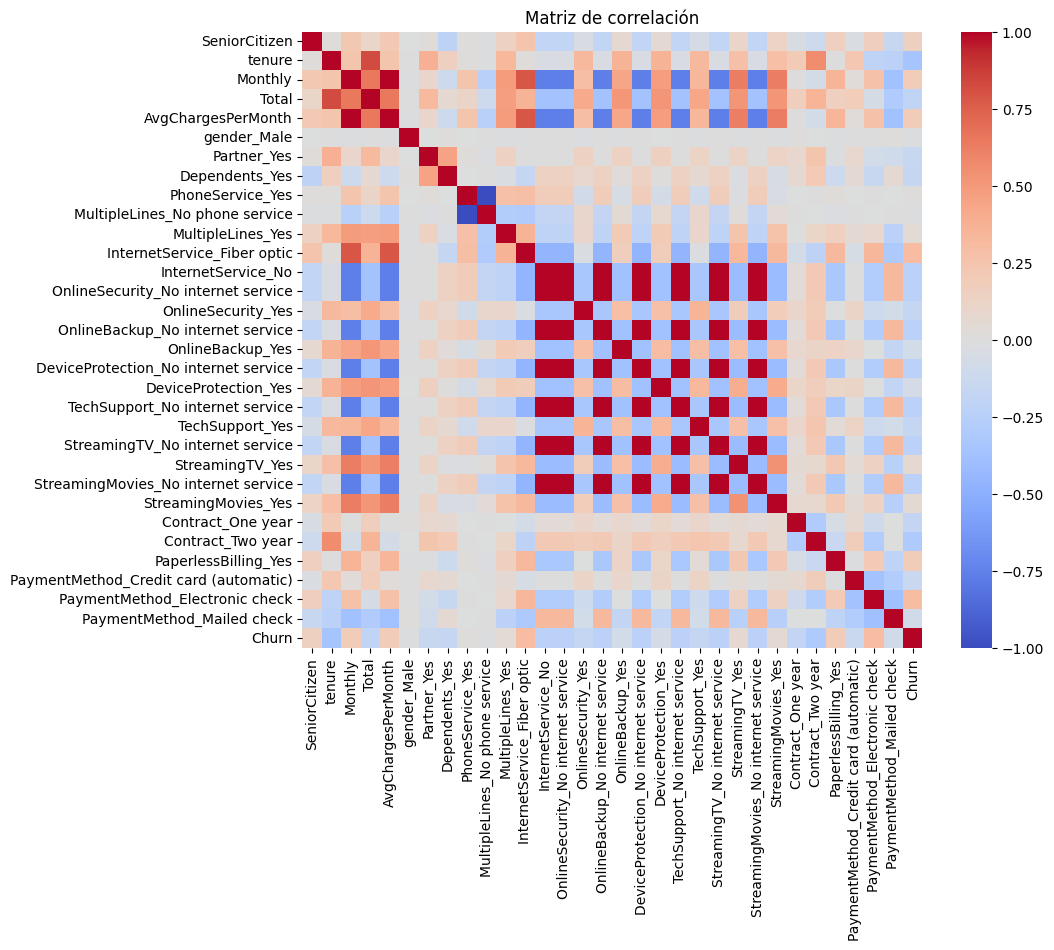

In [9]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X, y.rename("Churn")], axis=1).corr(), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

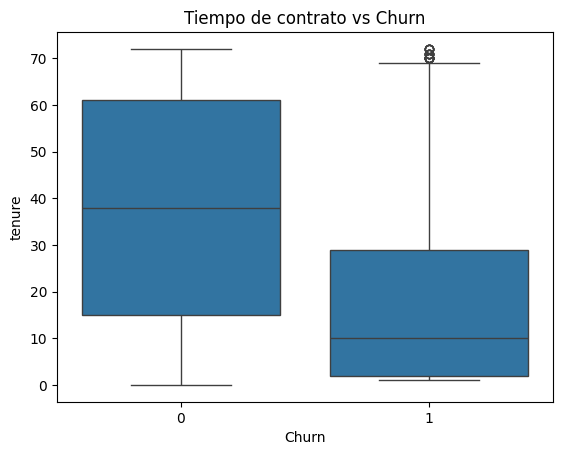

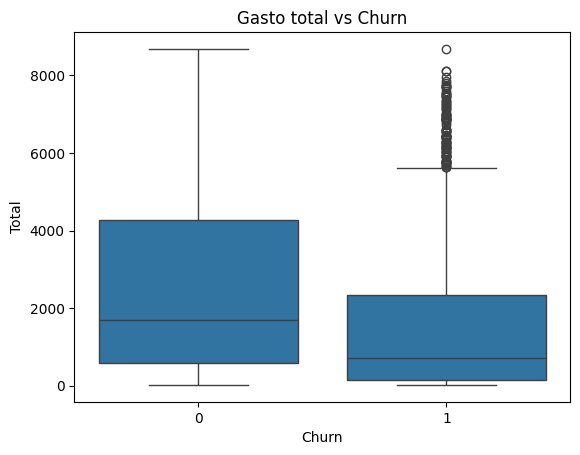

In [10]:
# Tenure vs churn
sns.boxplot(x=y, y=df_modelo["tenure"])
plt.title("Tiempo de contrato vs Churn")
plt.show()

# Total gastado vs churn
if "Total" in df_modelo.columns:
    sns.boxplot(x=y, y=df_modelo["Total"])
    plt.title("Gasto total vs Churn")
    plt.show()

In [11]:
# Reemplazar NaN por 0 en todas las variables (puedes cambiar la estrategia si quieres)
X = X.fillna(0)
X_scaled = X_scaled.fillna(0)


In [12]:
from sklearn.model_selection import train_test_split

# Verificaciones mínimas
faltan = [v for v in ["X", "y"] if v not in globals()]
if faltan:
    raise RuntimeError(f"Faltan variables previas: {faltan}. Ejecuta antes las celdas de encoding/target (Celda 3) y proporción (Celda 4).")

# Si no normalizaste (no existe X_scaled), usamos X como respaldo para la Logística
X_scaled_use = X_scaled if "X_scaled" in globals() else X.copy()

# Split con estratificación para mantener proporción de clases
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_scaled_use, y, test_size=0.30, random_state=42, stratify=y
)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("LogReg -> Train:", X_train_lr.shape, " Test:", X_test_lr.shape)
print("RF     -> Train:", X_train_rf.shape, " Test:", X_test_rf.shape)


LogReg -> Train: (4930, 31)  Test: (2113, 31)
RF     -> Train: (4930, 31)  Test: (2113, 31)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Asegurar que no hay NaN en los datos de entrenamiento
X_train_lr = X_train_lr.fillna(0)
X_train_rf = X_train_rf.fillna(0)

# Modelo sensible a escala: Regresión Logística
log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train_lr, y_train_lr)

# Modelo no sensible a escala: Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

print("Modelos entrenados con éxito.")


Modelos entrenados con éxito.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nombre}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1:", round(f1_score(y_test, y_pred), 4))
    print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar ambos modelos
evaluar("Regresión Logística", log_model, X_test_lr, y_test_lr)
evaluar("Random Forest", rf_model, X_test_rf, y_test_rf)


Modelo: Regresión Logística
Accuracy: 0.7974
Precision: 0.6377
Recall: 0.549
F1: 0.59

Matriz de confusión:
 [[1377  175]
 [ 253  308]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113


Modelo: Random Forest
Accuracy: 0.7913
Precision: 0.6322
Recall: 0.5116
F1: 0.5655

Matriz de confusión:
 [[1385  167]
 [ 274  287]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [16]:
# Regresión logística
coef_df = pd.DataFrame({"Variable": X.columns, "Coef": log_model.coef_[0]})
coef_df.sort_values(by="Coef", ascending=False).head(10)

# Random Forest
importances_df = pd.DataFrame({"Variable": X.columns, "Importancia": rf_model.feature_importances_})
importances_df.sort_values(by="Importancia", ascending=False).head(10)

Variable  Importancia
3                            Total     0.163735
1                           tenure     0.155525
4               AvgChargesPerMonth     0.131282
2                          Monthly     0.127349
29  PaymentMethod_Electronic check     0.038042
11     InternetService_Fiber optic     0.035532
26               Contract_Two year     0.030195
5                      gender_Male     0.024621
27            PaperlessBilling_Yes     0.023297
25               Contract_One year     0.022730

**Conclusiones:**
- El modelo con mejor rendimiento fue: (indicar cuál).
- Factores más influyentes en el churn: (listar variables clave).
- Recomendaciones:
  1. Incentivar contratos a largo plazo.
  2. Atención especial a clientes con poco tiempo de permanencia.
  3. Mejorar experiencia para clientes con alto gasto mensual.